In [1]:
import scvelo as scv
import cellrank as cr

In [2]:
adata = scv.read("Con10.h5ad")
adata

AnnData object with n_obs × n_vars = 2048 × 36601
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_RNA', 'nFeature_RNA', 'orig.ident.1', 'nCount_RNA.1', 'nFeature_RNA.1', 'percent.ribo', 'percent.mito', 'count.mad.lower', 'count.mad.higher', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.2', 'seurat_clusters', 'cell_type', 'RNA_snn_res.0.4', 'RNA_snn_res.0.8'
    var: 'features', 'ambiguous_features', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

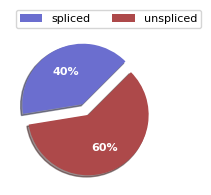

In [3]:
scv.pl.proportions(adata)


In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=20, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)

Filtered out 24990 genes that are detected 20 counts (shared).
Normalized count data: X, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
recovering dynamics (using 1/40 cores)


  0%|          | 0/470 [00:00<?, ?gene/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:697: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:700: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:01:56) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


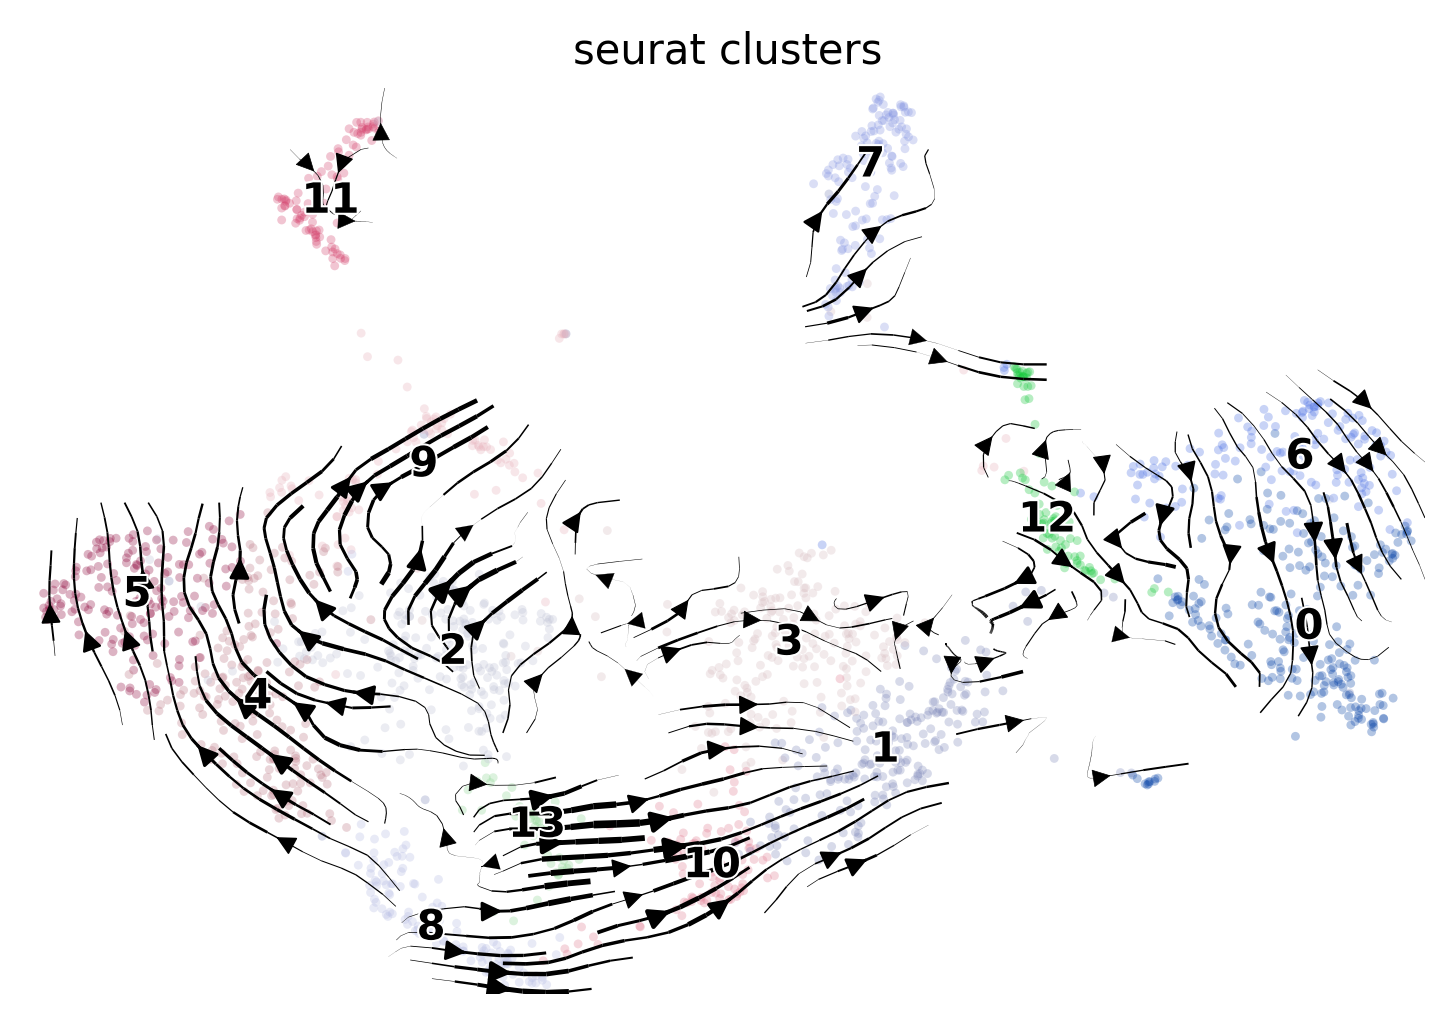

In [14]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=18, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


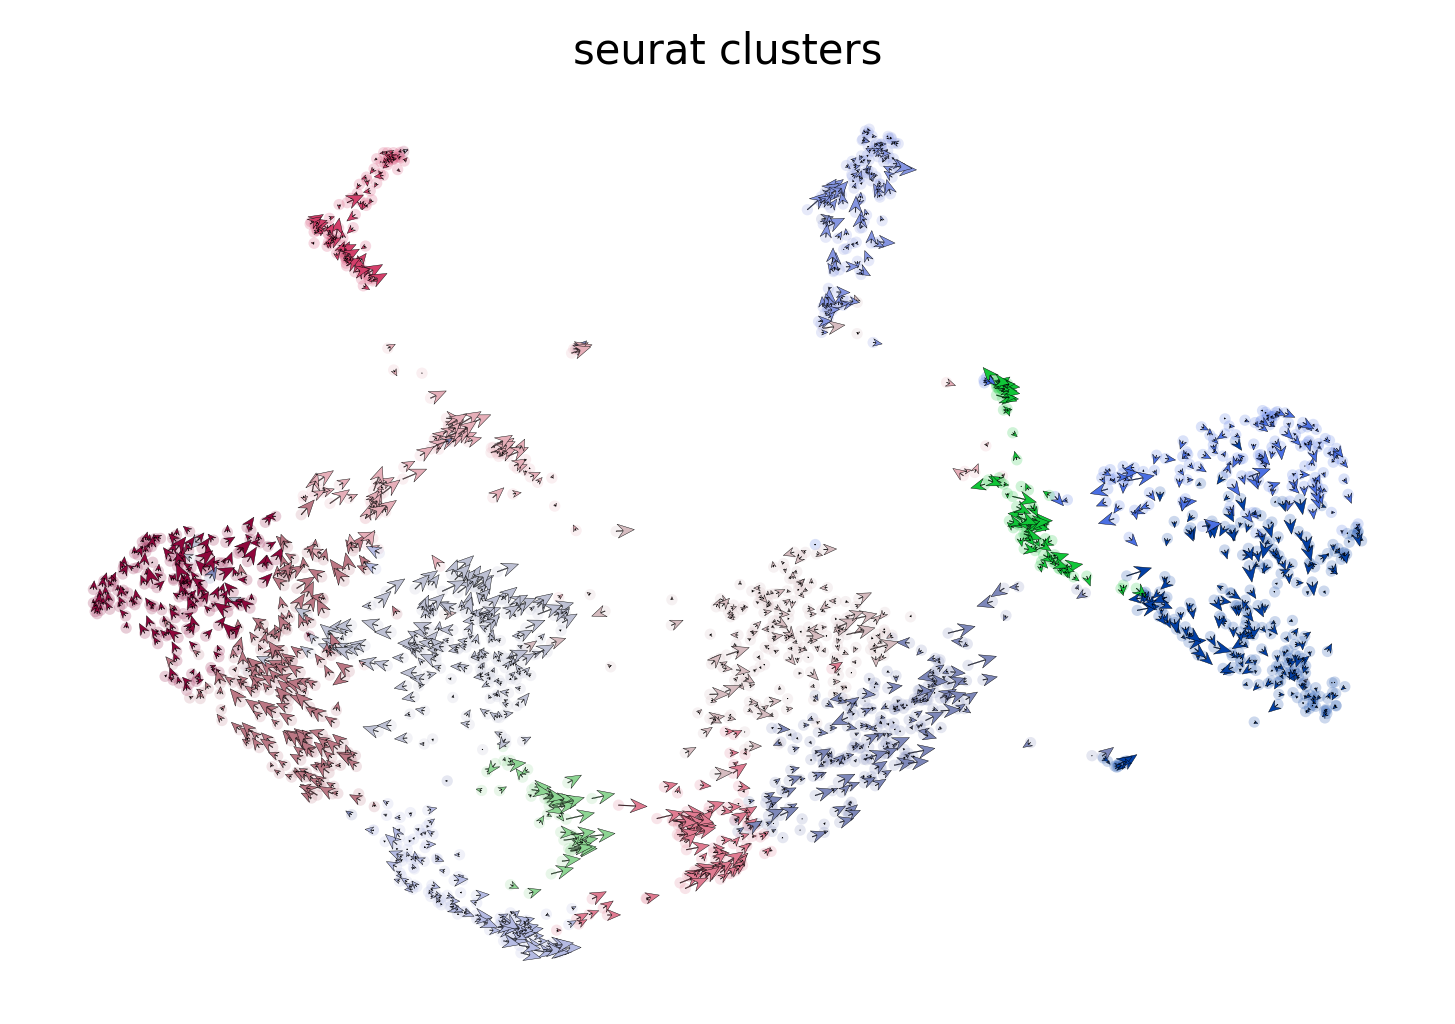

In [13]:
scv.pl.velocity_embedding(adata, basis="umap", color="seurat_clusters", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


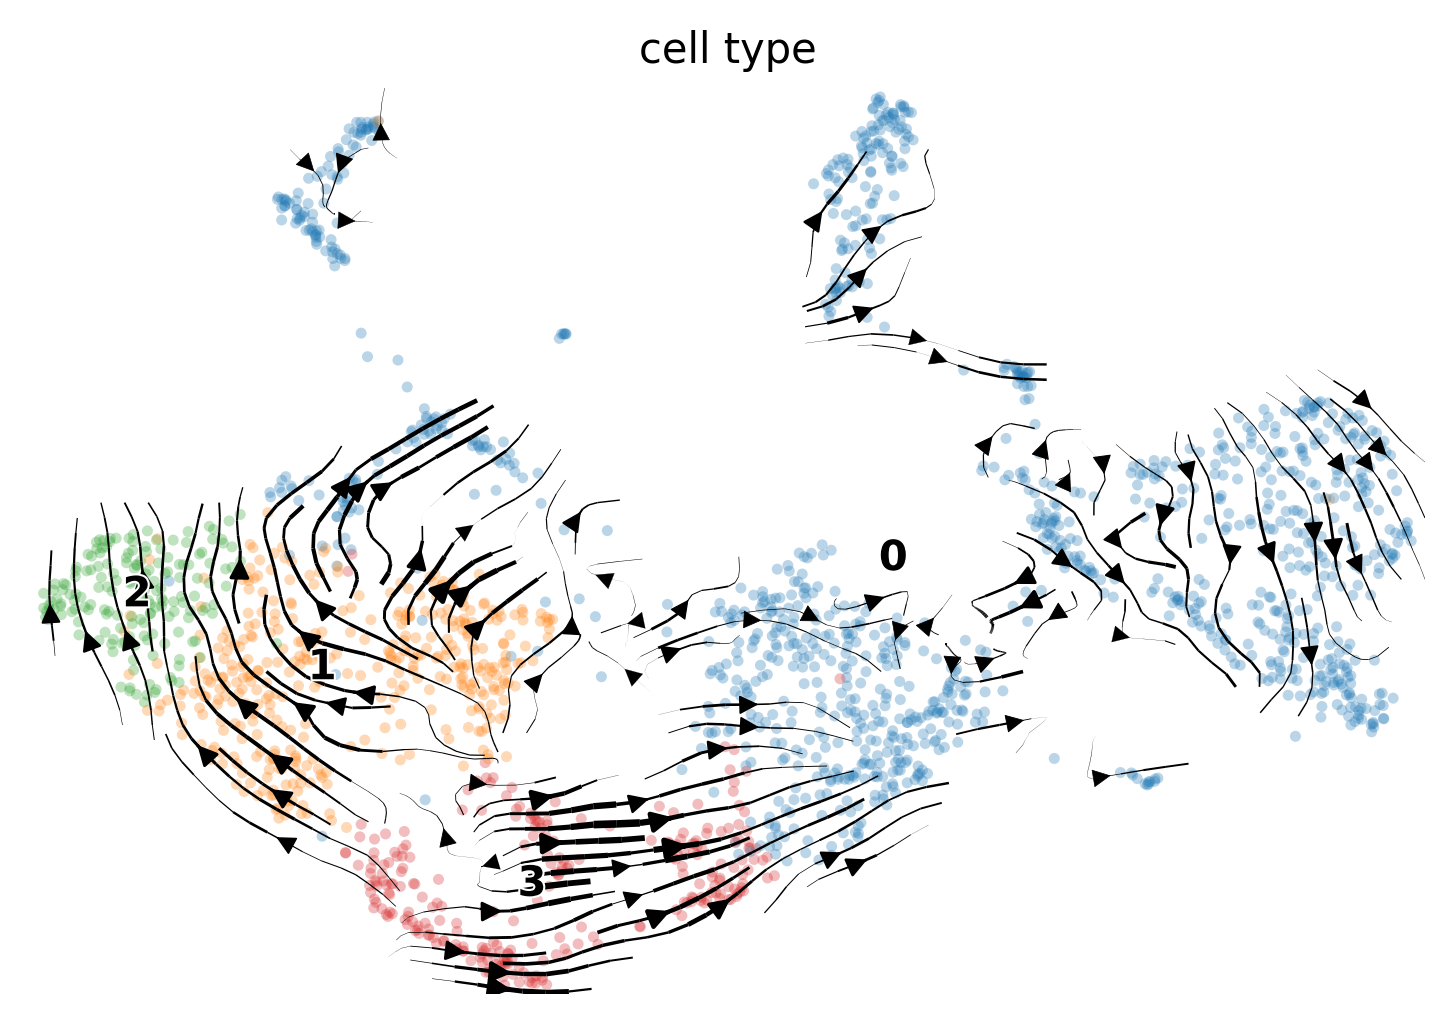

In [15]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


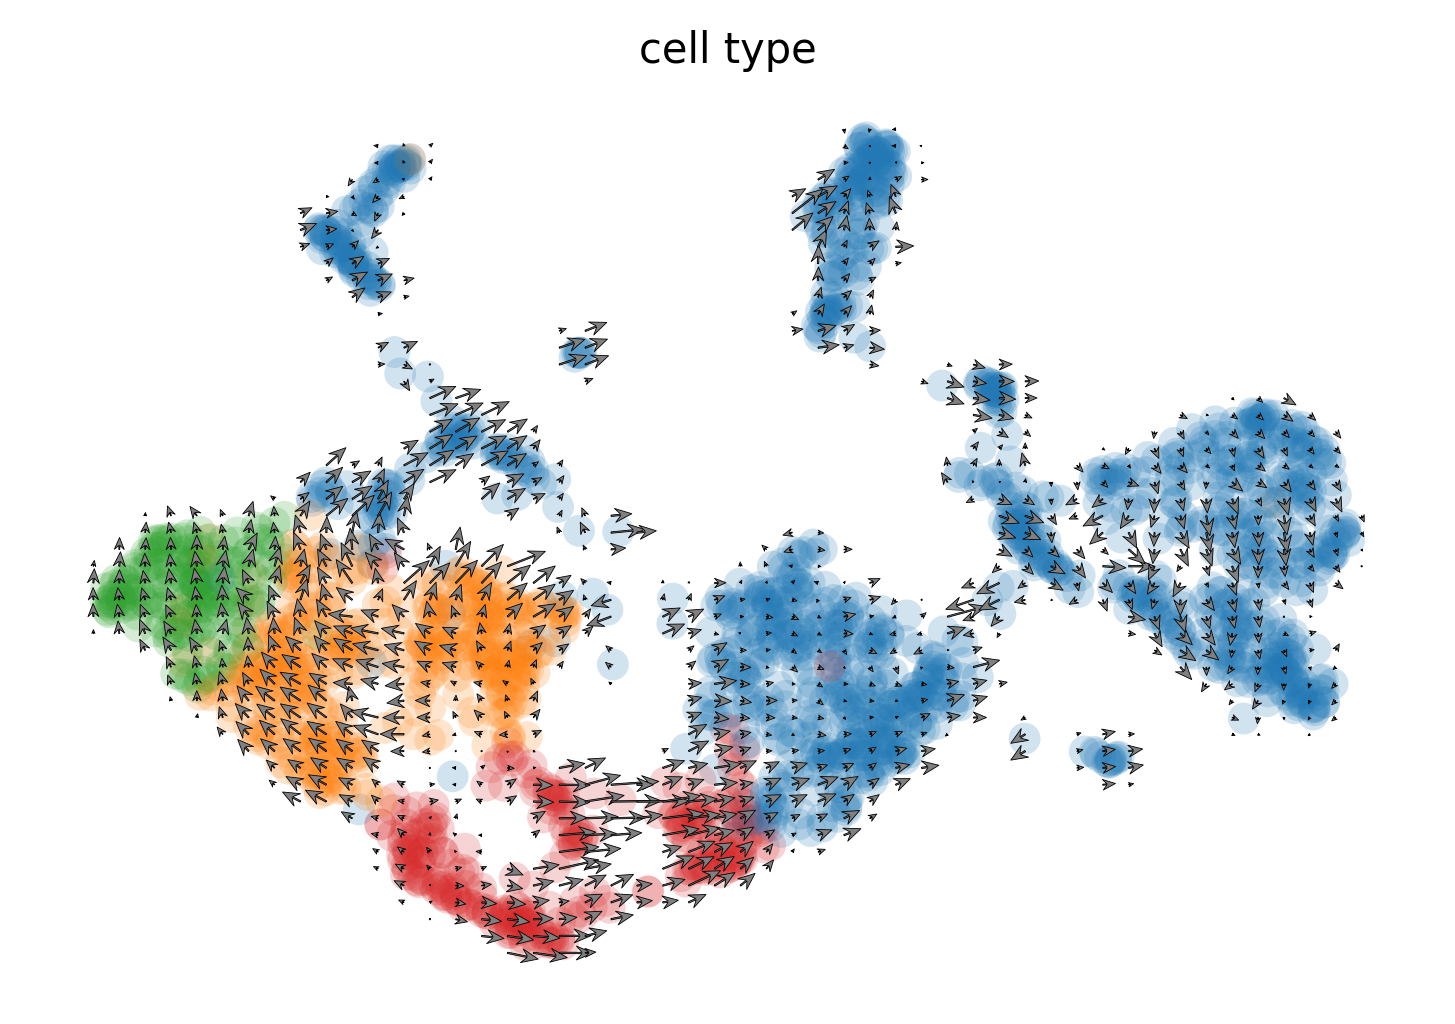

In [16]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


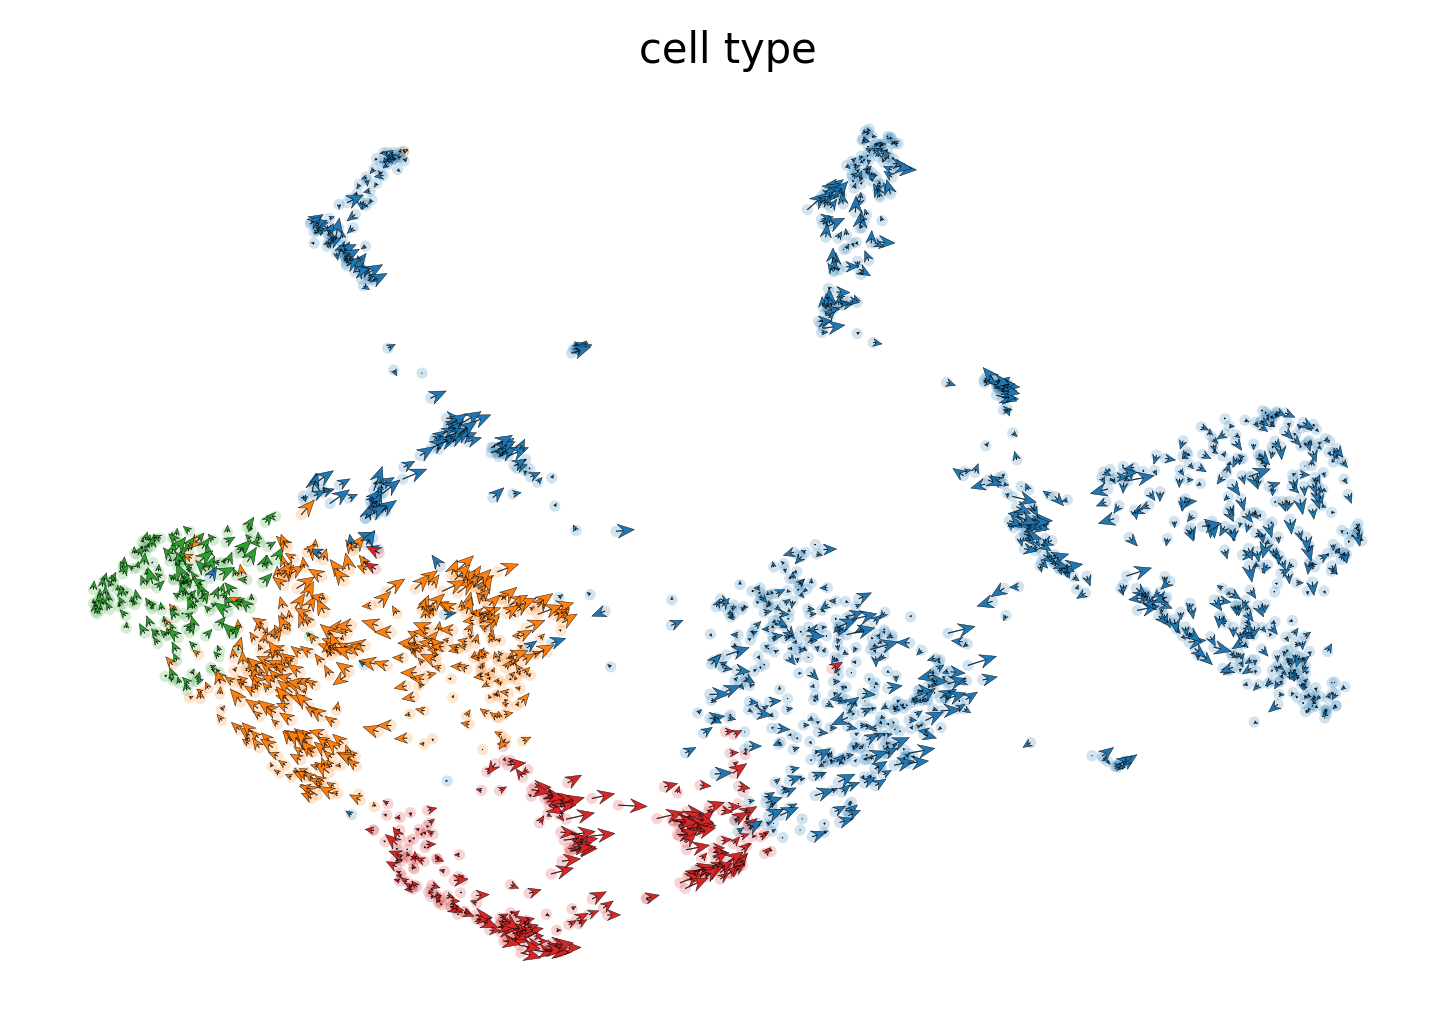

In [17]:
scv.pl.velocity_embedding(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


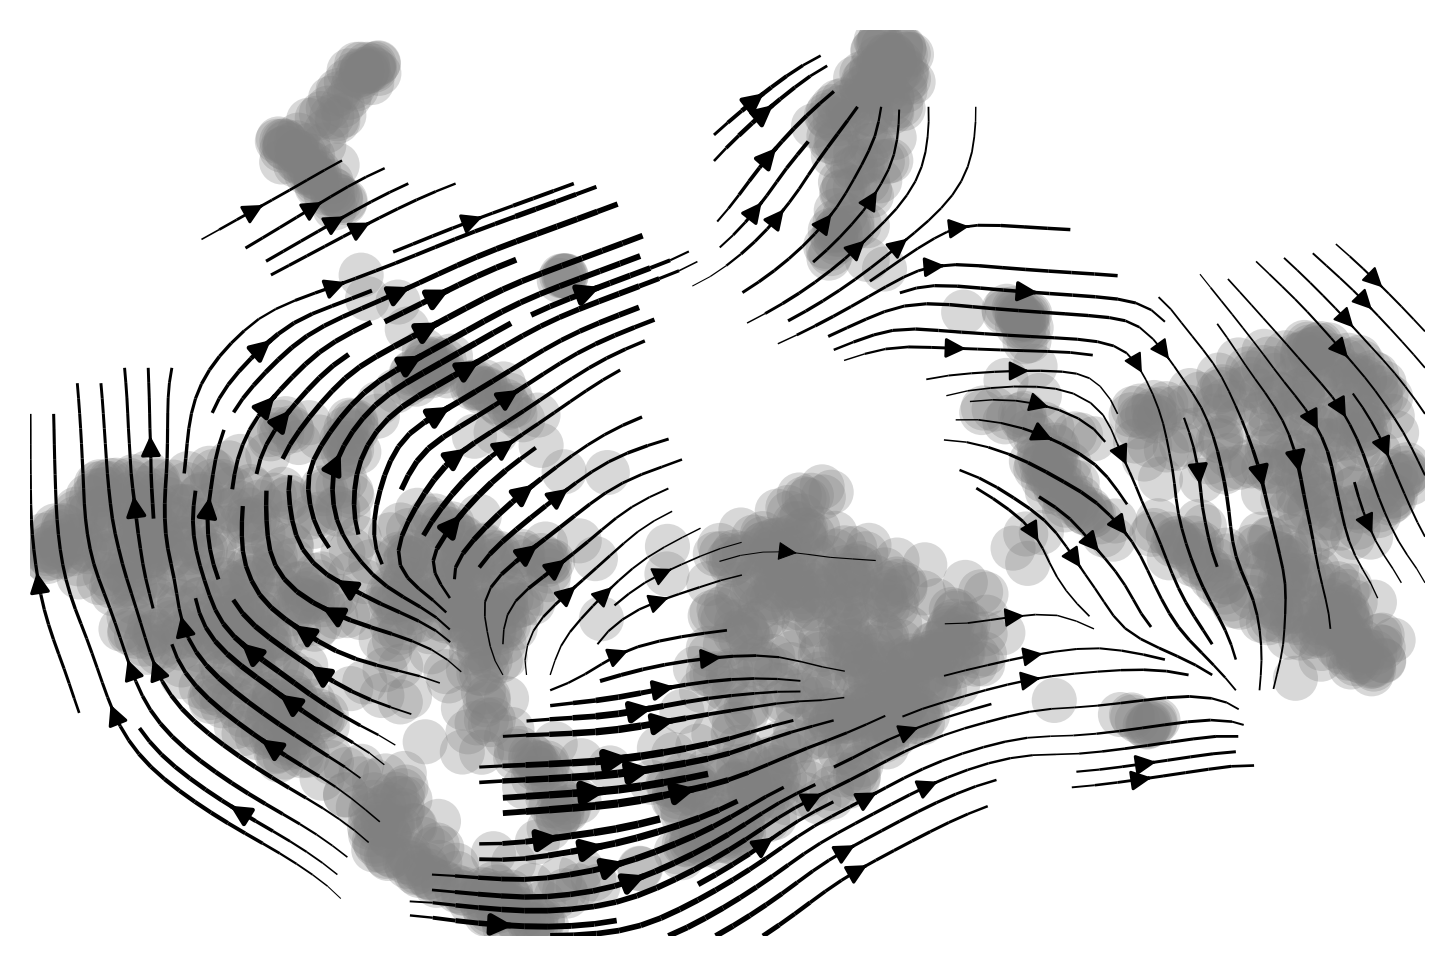

In [18]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=2, min_mass=4, dpi=300
)

### Velocity graph and pseudotime


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


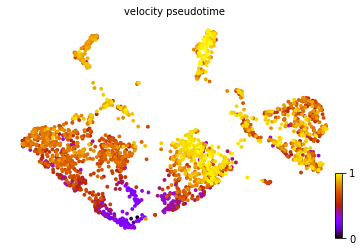

In [19]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

### phase portraits of some marker genes

In [20]:
#scv.pl.velocity(adata, ['PDGFRA'], ncols=1, dpi=300)
#scv.pl.velocity(adata, ['POU5F1'], ncols=1, dpi=300)

### Important genes from velocity

In [21]:
scv.tl.rank_velocity_genes(adata, groupby='cell_type', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(30)

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0          1          2          3
0        FGF13  VLDLR-AS1     FAM83B     LRRTM3
1         NEBL     SEC24D      RSPO4     IGFBP5
2          TTN     FAM83B    DENND1B     NFATC2
3      PCDH11X  LINC00937       BDNF      SYTL3
4       FRMD4B      ATXN1    ARHGAP8     DUSP27
5         NEXN      DOCK9     SEC24D  LINC00937
6       RBFOX1    PKHD1L1      ATXN1      TBX20
7      CCDC141    ARHGAP8      ACTN2      KCNH7
8        DOCK5      TBX20      DOCK9      CPEB2
9         MYLK      ACTN2      TTYH1       JPH2
10       TGFB2      ITGA3  VLDLR-AS1      ABTB2
11      SLC8A1     TRIM56        MCC    SLC30A8
12     GALNT17      ITPR2     KLHL24      RSPO2
13     CACNA1A     ZNF697   TMEM200A      TRPC3
14        FUT9    C3orf52    TMEM135        DMD
15       MYH14      TTYH1       NPNT     MALAT1
16       PCDH7    DENND1B      ITPR2       CDH6
17        MYL4    TMEM135    PKHD1L1      ITGA3
18        SHC3    SLC30A8     ZNF697       JPH1
19      COL3A1     CRABP1     ZBTB20     CRABP1
20        GARS     ABLIM1      MKI67      CENPE
21  AC015522.1       IRX2     VANGL2      TOP2A
22      HAPLN1        MCC  LINC00937    C3orf52
23       ARAP3       NRG2       NRG2    CYP26C1
24       ALPK2       NFIA      LOXL3       ASPM
25       EDNRA   TMEM200A      PLCE1    CACNA1D
26         TNC      RSPO4     PDLIM5       VWDE
27        CDK6      SYTL3     ADGRD1     SEMA3D
28        FGD5       ABRA       CDH6      GTSE1
29       RSPH9    IGFBPL1      KIF14     STRIP2

In [23]:
#scv.pl.scatter(adata, 'LINC01695', color=['cell_type', 'velocity'])
#scv.pl.velocity(adata, ['LINC01695'], ncols=1, dpi=300)

### Speed and coherence



--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


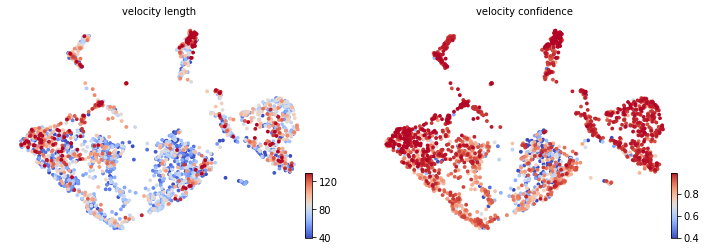

In [24]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

## CellRank

In [25]:
k = cr.tl.transition_matrix(
    adata, weight_connectivities=0.2, softmax_scale=4, show_progress_bar=False
)
cr.tl.terminal_states(adata, cluster_key="cell_type", weight_connectivities=0.2)

### Terminal state

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


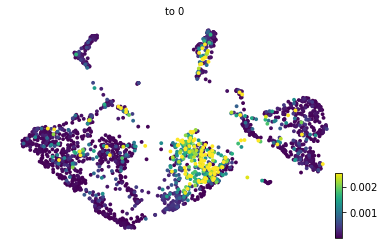

In [26]:
cr.pl.terminal_states(adata)


### Initial state

  0%|          | 0/2048 [00:00<?, ?cell/s]

  0%|          | 0/2048 [00:00<?, ?cell/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


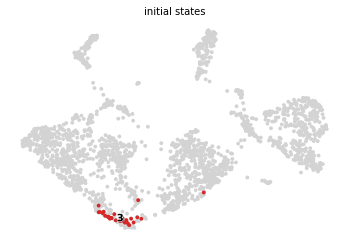

In [27]:
cr.tl.initial_states(adata, cluster_key="cell_type")
cr.pl.initial_states(adata, discrete=True)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


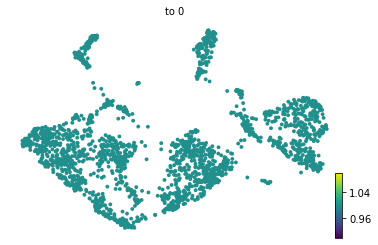

In [28]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


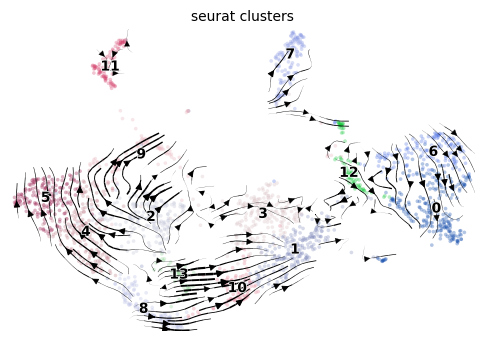

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


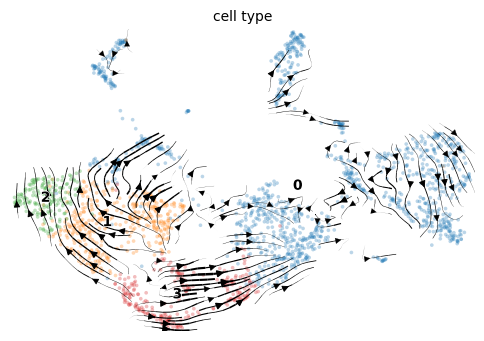

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


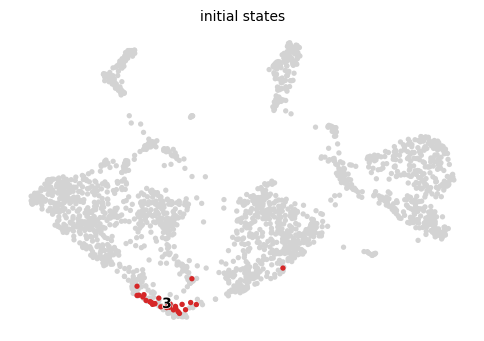

In [29]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=28, dpi=100)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=100)
cr.pl.initial_states(adata, discrete=True, dpi=100)